<a href="https://colab.research.google.com/github/rishysp/Stock_prediction_LSTM/blob/main/Image_Preprocessing_and_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import shutil
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import os
import random
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import to_categorical
from keras import optimizers
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

In [3]:
df = pd.read_csv('/content/train_new.csv')
df.head()

,image,class
0,a lot8744_frame0.jpg,a lot
1,a lot8744_frame1.jpg,a lot
2,a lot8745_frame0.jpg,a lot
3,a lot8745_frame1.jpg,a lot
4,a lot8745_frame2.jpg,a lot


In [4]:
top = df['class'].value_counts()
ds= pd.DataFrame(top[:20])
ds

,class
cousin,47
thin,45
go,40
interest,39
drink,39
computer,39
cool,39
short,38
shirt,38
thanksgiving,38


In [5]:
import cv2
labels = list(ds.index)
labels

['cousin',
 'thin',
 'go',
 'interest',
 'drink',
 'computer',
 'cool',
 'short',
 'shirt',
 'thanksgiving',
 'trade',
 'who',
 'later',
 'apple',
 'accident',
 'before',
 'tall',
 'man',
 'appointment',
 'change']

In [6]:
import tensorflow as tf
tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/train_small/',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 769 files belonging to 20 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
ds['sign'] = list(ds.index)
ds

,class,sign
cousin,47,cousin
thin,45,thin
go,40,go
interest,39,interest
drink,39,drink
computer,39,computer
cool,39,cool
short,38,short
shirt,38,shirt
thanksgiving,38,thanksgiving


In [8]:
ds.index = pd.to_numeric(ds.index, errors='coerce')
#ds.set_index()
ds

,class,sign
NaN,47,cousin
NaN,45,thin
NaN,40,go
NaN,39,interest
NaN,39,drink
NaN,39,computer
NaN,39,cool
NaN,38,short
NaN,38,shirt
NaN,38,thanksgiving


In [9]:
labels_dict = dict(zip(range(0,20),ds.sign))
labels_dict

{0: 'cousin',
 1: 'thin',
 2: 'go',
 3: 'interest',
 4: 'drink',
 5: 'computer',
 6: 'cool',
 7: 'short',
 8: 'shirt',
 9: 'thanksgiving',
 10: 'trade',
 11: 'who',
 12: 'later',
 13: 'apple',
 14: 'accident',
 15: 'before',
 16: 'tall',
 17: 'man',
 18: 'appointment',
 19: 'change'}

In [10]:
len(labels_dict.values())

20

In [11]:
import pathlib
path = '/content/gdrive/MyDrive/train_small/'
sign_images_dict = {}
len_classes = os.listdir(path)
path1 = pathlib.Path(path)
for img in range(len(len_classes)):
    sign_images_dict[img] = list(path1.glob(str(labels_dict[img])+'/*'))
sign_images_dict[0][0]

PosixPath('/content/gdrive/MyDrive/train_small/cousin/cousin106_frame2.jpg')

In [12]:
import numpy as np
x,y=[],[]
for sign_label,images in sign_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        x.append(resized_img)
        y.append(sign_label)
x = np.array(x)
y = np.array(y)
x[0]

array([[[ 1,  1,  1],
        [ 1,  1,  1],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 1,  1,  1]],

       [[85, 86, 84],
        [85, 86, 84],
        [86, 87, 85],
        ...,
        [66, 67, 66],
        [66, 67, 65],
        [22, 23, 21]],

       [[86, 87, 85],
        [86, 87, 85],
        [87, 88, 86],
        ...,
        [64, 65, 63],
        [68, 69, 67],
        [20, 21, 19]],

       ...,

       [[68, 69, 67],
        [69, 70, 68],
        [68, 69, 67],
        ...,
        [64, 65, 63],
        [67, 68, 66],
        [21, 22, 20]],

       [[67, 68, 65],
        [68, 69, 67],
        [67, 69, 66],
        ...,
        [65, 67, 65],
        [66, 67, 65],
        [22, 23, 21]],

       [[ 6,  8,  5],
        [ 5,  6,  4],
        [ 6,  7,  5],
        ...,
        [ 2,  3,  1],
        [ 2,  3,  1],
        [ 2,  3,  2]]], dtype=uint8)

In [13]:
x.shape

(769, 224, 224, 3)

In [14]:
y[0]

0

In [15]:
x = x/255.0
x[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.33333333, 0.3372549 , 0.32941176],
        [0.33333333, 0.3372549 , 0.32941176],
        [0.3372549 , 0.34117647, 0.33333333],
        ...,
        [0.25882353, 0.2627451 , 0.25882353],
        [0.25882353, 0.2627451 , 0.25490196],
        [0.08627451, 0.09019608, 0.08235294]],

       [[0.3372549 , 0.34117647, 0.33333333],
        [0.3372549 , 0.34117647, 0.33333333],
        [0.34117647, 0.34509804, 0.3372549 ],
        ...,
        [0.25098039, 0.25490196, 0.24705882],
        [0.26666667, 0.27058824, 0.2627451 ],
        [0.07843137, 0.08235294, 0.0745098 ]],

       ...,

       [[0.26666667, 0.27058824, 0.2627451 ],
        [0.27058824, 0.2745098 , 0.26666667],
        [0.26666667, 0

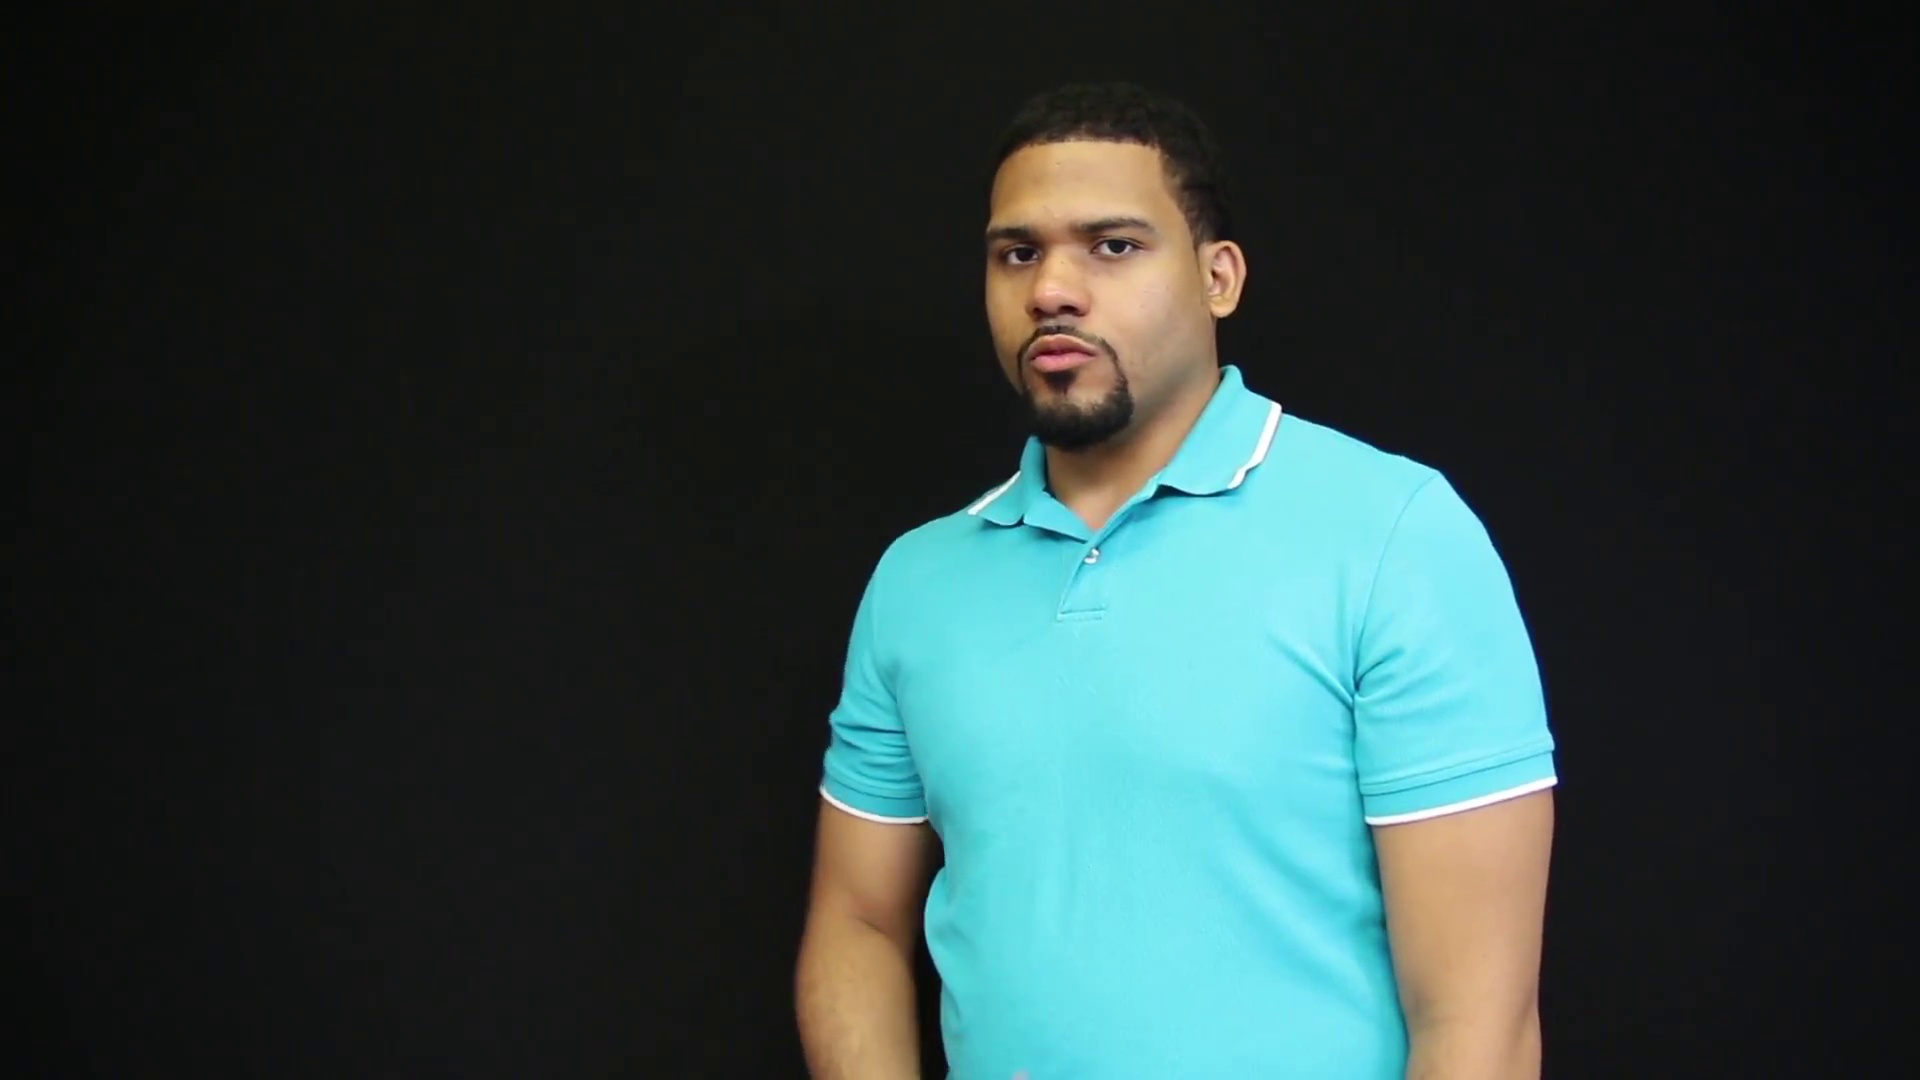

In [16]:
import PIL
PIL.Image.open(str(sign_images_dict[1][19]))

In [17]:
data_dir = '/content/gdrive/MyDrive/train_small/'

In [18]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import splitfolders
input_folder = data_dir

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 769 files [00:01, 403.44 files/s]


In [20]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
    preprocessing_function=to_grayscale_then_rgb)

test_datagen = ImageDataGenerator(rescale = 1./255,
    preprocessing_function=to_grayscale_then_rgb)

training_set = train_datagen.flow_from_directory('/content/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/output/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 606 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [22]:
class_names = list(labels_dict.values())
print(class_names)

['cousin', 'thin', 'go', 'interest', 'drink', 'computer', 'cool', 'short', 'shirt', 'thanksgiving', 'trade', 'who', 'later', 'apple', 'accident', 'before', 'tall', 'man', 'appointment', 'change']


In [28]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Input

In [36]:
from keras.applications.vgg16 import VGG16
from glob import glob
from keras.models import Model
vgg = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/output/test/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [37]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=7, monitor='loss')

In [38]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set), verbose=1, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
19/19 [==============================] - 42s 2s/step - loss: 3.9742 - accuracy: 0.1914 - val_loss: 4.2214 - val_accuracy: 0.1600
Epoch 2/100
19/19 [==============================] - 36s 2s/step - loss: 2.2027 - accuracy: 0.4092 - val_loss: 2.9069 - val_accuracy: 0.1600
Epoch 3/100
19/19 [==============================] - 34s 2s/step - loss: 1.6348 - accuracy: 0.5116 - val_loss: 2.2850 - val_accuracy: 0.3100
Epoch 4/100
19/19 [==============================] - 33s 2s/step - loss: 1.3698 - accuracy: 0.5776 - val_loss: 1.9782 - val_accuracy: 0.3700
Epoch 5/100
19/19 [==============================] - 36s 2s/step - loss: 1.2568 - accuracy: 0.6287 - val_loss: 1.9680 - val_accuracy: 0.3600
Epoch 6/100
19/19 [==============================] - 37s 2s/step - loss: 1.1440 - accuracy: 0.6650 - val_loss: 1.8436 - val_accuracy: 0.4100
Epoch 7/100
19/19 [==============================] - 36s 2s/step - loss: 1.0060 - accuracy: 0.6898 - val_loss: 1.7706 - val_accuracy: 0.4300
Epoch 8/100
1

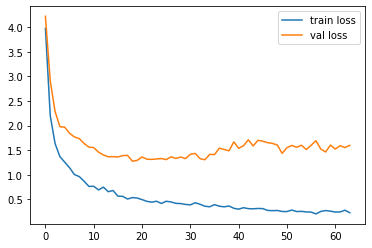

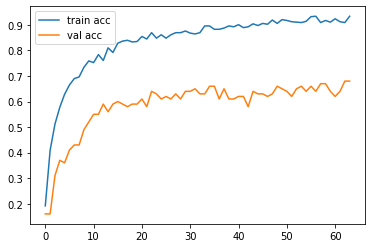

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [40]:
model.save('vgg16gray.h5')

In [42]:
from google.colab import files
files.download('vgg16gray.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>